In [1]:
import os

import pydicom
from tqdm.notebook import tqdm

import numpy as np
from skimage.transform import resize
import matplotlib.pyplot as plt

from fastmri.preprocessing import preprocess_dicom, dicom_to_3d_array

In [2]:
MRI_SIZE = (320, 320)
MRI_TYPE = 'AX T2'
FIRST_SLICES = 9

PATH_TO_DATA = 'data'
PATH_TO_DICOM = os.path.join(PATH_TO_DATA, 'brain_fastMRI_DICOM')

!mkdir -p $PATH_TO_DATA

In [3]:
folders = os.listdir(PATH_TO_DICOM)
folders = sorted([f for f in folders if not f.startswith('.')])
folders = [os.path.join(PATH_TO_DICOM, f) for f in folders]

In [4]:
PATH_TO_SAVE = MRI_TYPE.replace(' ', '_').lower() + '_single_source'
PATH_TO_SAVE = os.path.join(PATH_TO_DATA, PATH_TO_SAVE)

os.makedirs(PATH_TO_SAVE, exist_ok=True)
PATH_TO_SAVE

'../data/ax_t2_single_source'

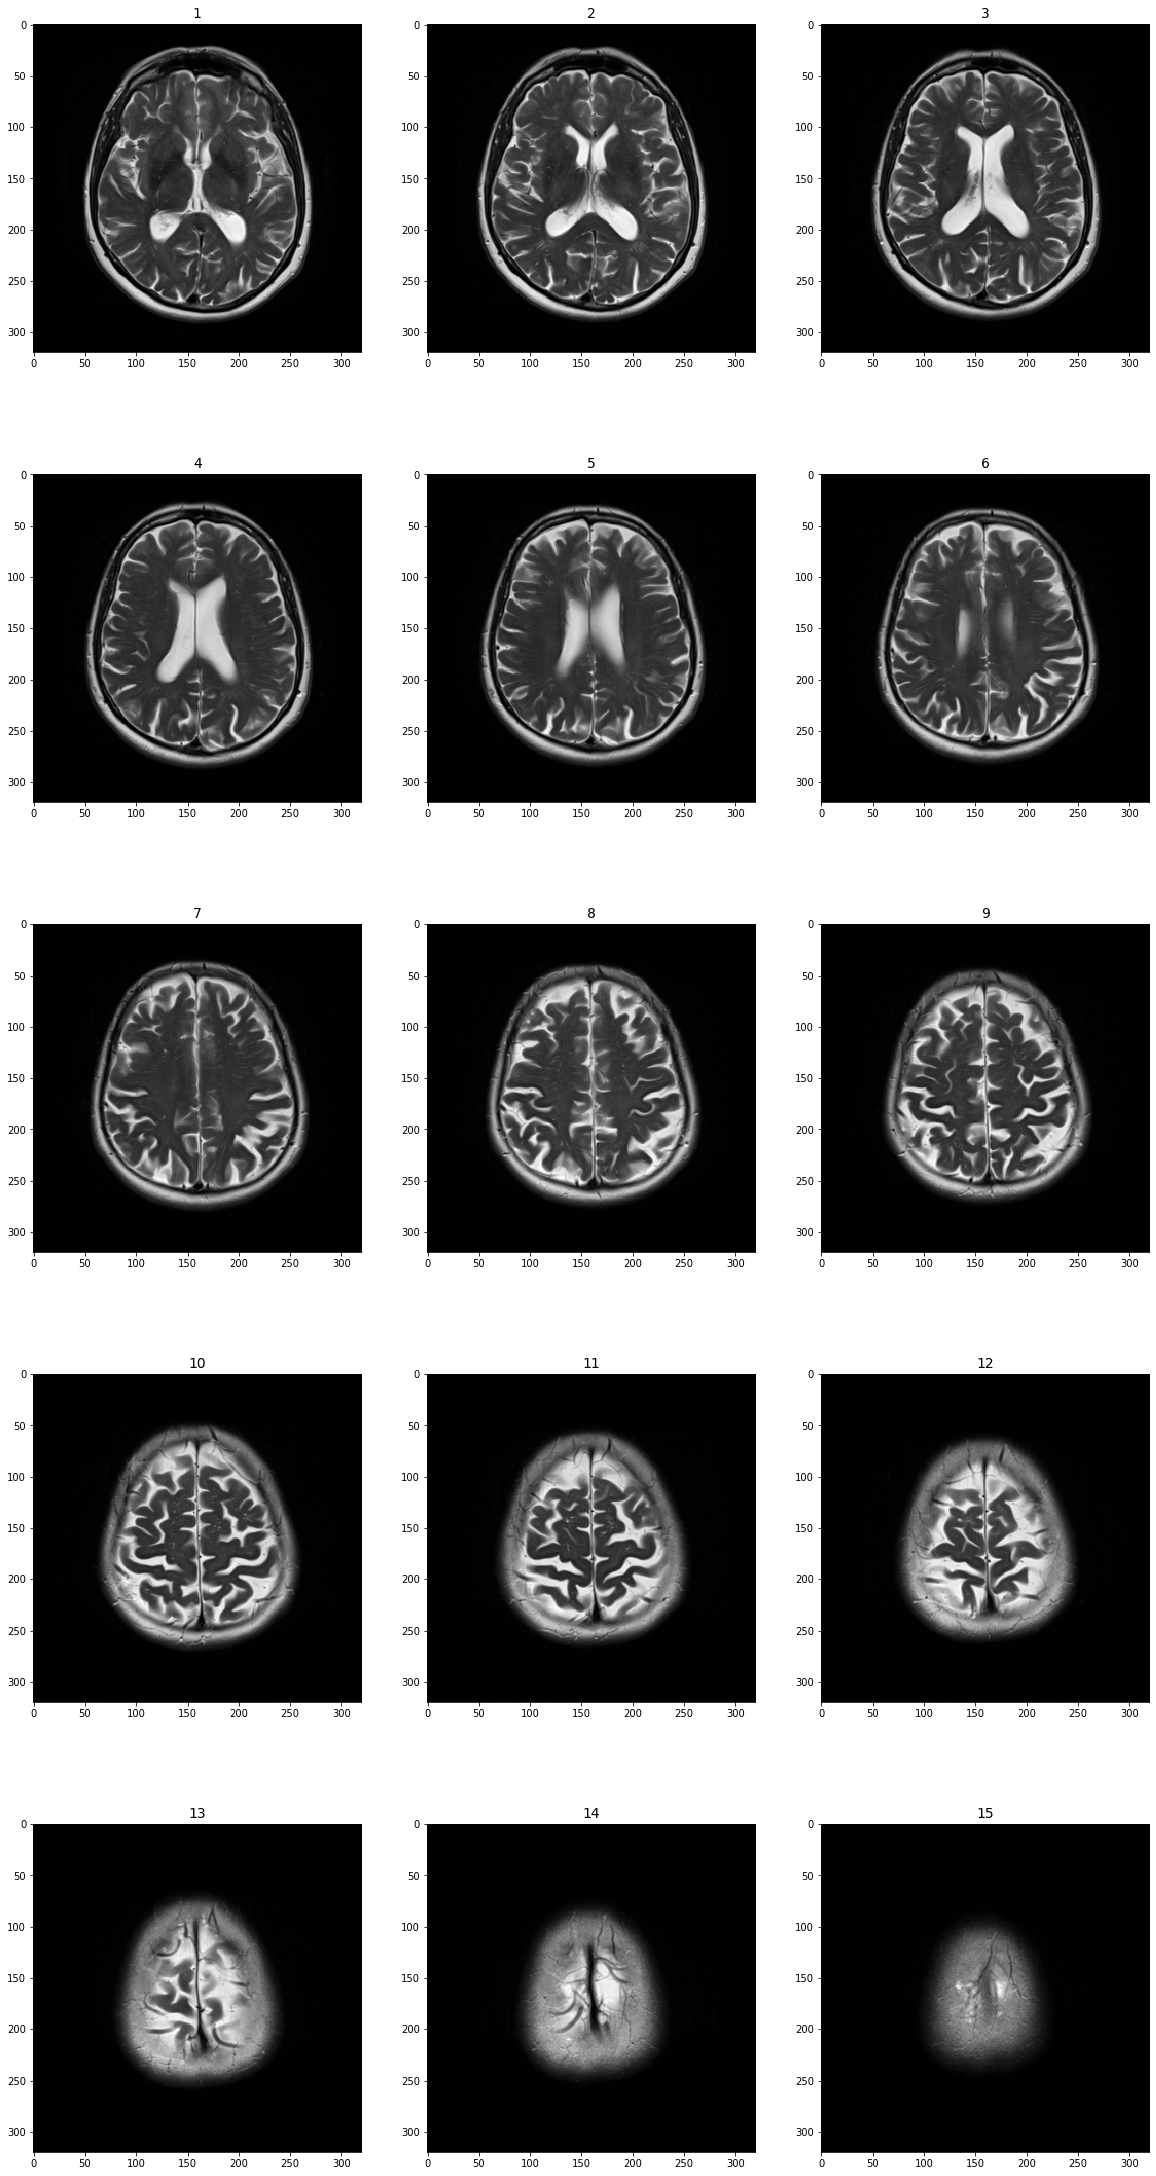

In [5]:
image = dicom_to_3d_array(folders[2], MRI_TYPE, first_slices=15, resize_shape=MRI_SIZE)

cols = 3
rows = (len(image) // cols) + (0 if len(image) % cols == 0 else 1)

fig, axis = plt.subplots(rows, cols, figsize=(20, 40))
for i, slice in enumerate(image):
    axis[i//cols, i%cols ].imshow(slice, cmap=plt.cm.gray)
    axis[i//cols, i%cols ].set_title(f'{i+1}', fontsize=14)

In [6]:
preprocess_dicom(folders, PATH_TO_SAVE, MRI_TYPE, FIRST_SLICES, MRI_SIZE)